In [10]:
import descarteslabs as dl
import numpy as np

# Define a bounding box around study area in Larimer county Colorado in a GeoJSON

taos = {
    "type": "Polygon",
    "coordinates": [
        [
            [
              -106.0675048828125,
              40.43963107298772
            ],
            [
              -105.391845703125,
              40.43963107298772
            ],
            [
              -105.391845703125,
              40.73268976628568
            ],
            [
              -106.0675048828125,
              40.73268976628568
            ],
            [
              -106.0675048828125,
              40.43963107298772
            ]
        ]
    ]
}

# Create a SceneCollection
scenes, ctx = dl.scenes.search(taos,
                               products=["landsat:LC08:01:RT:TOAR", "sentinel-2:L1C"],
                               start_datetime="2018-05-01",
                               end_datetime="2018-06-01",
                               cloud_fraction=0.2,
                               limit=15)


In [11]:
print(scenes)


SceneCollection of 5 scenes
  * Dates: May 10, 2018 to May 26, 2018
  * Products: landsat:LC08:01:RT:TOAR: 2, sentinel-2:L1C: 3


In [12]:
print(scenes.each.properties.id)


'landsat:LC08:01:RT:TOAR:meta_LC08_L1TP_034032_20180510_20180511_01_RT_v1'
'landsat:LC08:01:RT:TOAR:meta_LC08_L1TP_034032_20180526_20180526_01_RT_v1'
'sentinel-2:L1C:2018-05-17_13TCE_99_S2A_v1'
'sentinel-2:L1C:2018-05-17_13TCF_46_S2A_v1'
'sentinel-2:L1C:2018-05-17_13TDE_99_S2A_v1'


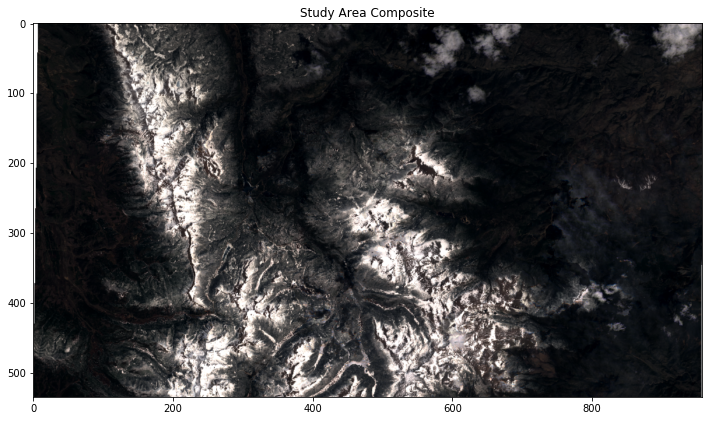

In [13]:
# Make a lower-resolution GeoContext
ctx_lowres = ctx.assign(resolution=60)

# Request a NumPy stack of all the scenes using the same GeoContext
arr_stack = scenes.stack("red green blue", ctx_lowres)

# Composite the scenes based on the median pixel value
composite = np.ma.median(arr_stack, axis=0)
dl.scenes.display(composite, title="Study Area Composite")


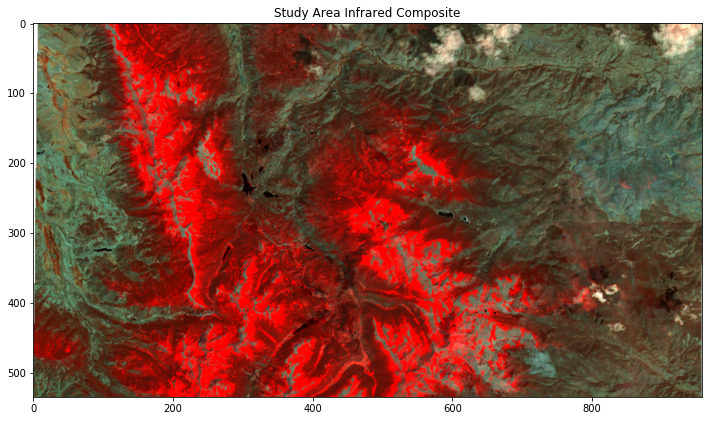

In [14]:
false_color_stack = scenes.stack("nir swir1 swir2", ctx_lowres)
composite = np.ma.median(false_color_stack, axis=0)
dl.scenes.display(composite, title="Study Area Infrared Composite")